In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import heapq

In [2]:
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

In [3]:
def astar(maze, start, end):
    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize open and closed lists
    open_list = []
    closed_list = []

    # Add the start node
    heapq.heappush(open_list, (start_node.f, start_node))

    # Loop until finding the end
    while open_list:
        # Get the current node
        current_node = heapq.heappop(open_list)[1]

        # Add current node to the closed list
        closed_list.append(current_node)

        # If reached the end, reconstruct the path and return
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]

        # Generate neighbors
        neighbors = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Check if within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Check if wall
            if maze[node_position[0]][node_position[1]] == 1:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            neighbors.append(new_node)

        # Loop through neighbors
        for neighbor in neighbors:
            # Check if neighbor is in closed list
            if neighbor in closed_list:
                continue

            # Calculate full path cost
            neighbor.g = current_node.g + 1
            neighbor.h = ((neighbor.position[0] - end_node.position[0]) ** 2) + ((neighbor.position[1] - end_node.position[1]) ** 2)
            neighbor.f = neighbor.g + neighbor.h

            # Check if neighbor is in open list and if it has a lower f
            for open_node in open_list:
                if neighbor == open_node[1] and neighbor.g > open_node[1].g:
                    continue

            # Add neighbor to open list
            heapq.heappush(open_list, (neighbor.f, neighbor))

    # No path found
    return None

def generate_binary_maze(n, m, obstacle_density=0.3):
    maze = np.zeros((n, m), dtype=int)
    num_obstacles = int(n * m * obstacle_density)

    # Populate the maze with obstacles
    obstacle_positions = random.sample(range(n * m), num_obstacles)
    for pos in obstacle_positions:
        row, col = divmod(pos, m)
        maze[row, col] = 1

    return maze.tolist()

def astar_3d(points = 'mason_cloud_filtered.xyz'):
    point_list = []
    with open(points, 'r') as f:
        for line in f:
            point_list.append([float(x) for x in line.split()])
    
    return point_list
    
def plot_top_down(points):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    
    ax.scatter(points[:, 0], points[:, 1], s=1)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    plt.show()

def find_start_end_points(maze):
    zeros = np.argwhere(maze == 0)
    start_point, end_point = random.sample(list(zeros), 2)
    return tuple(start_point), tuple(end_point)


302.0 146.0


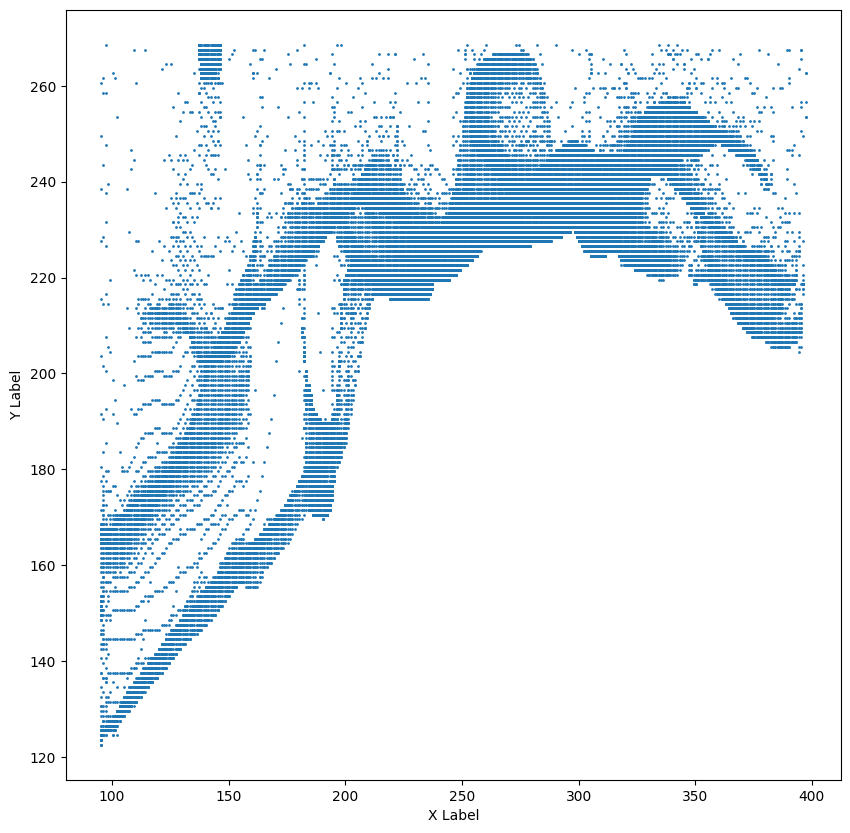

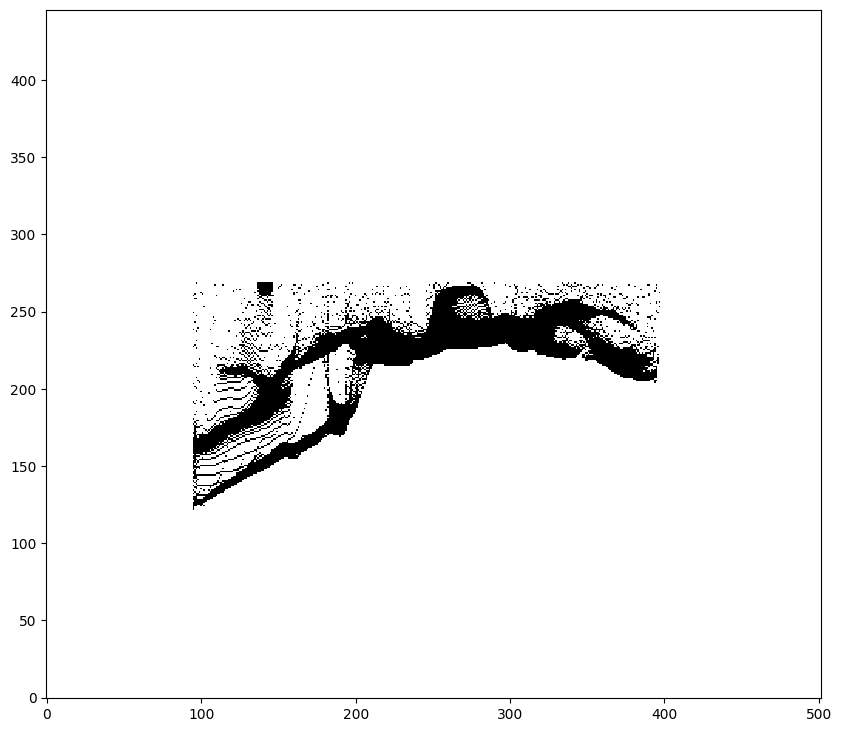

In [4]:
p = astar_3d('mason_cloud_filtered.xyz')

# round each y value to the nearest integer without upscaling
p = np.array(p)
p[:, 1] = np.round(p[:, 1] * 10)

# recenter the points based on the average x and y values
p[:, 0] = p[:, 0] - p[:, 0].mean()
p[:, 1] = p[:, 1] - p[:, 1].mean()

# calculate the range of the x and y values
x_range = p[:, 0].max() - p[:, 0].min()
y_range = p[:, 1].max() - p[:, 1].min()
print(x_range, y_range)

# create the maze with size of x and y range plus some offset to each component to broaden the window
x_size = int(x_range) + 200
y_size = int(y_range) + 300
maze = np.zeros((y_size, x_size), dtype=int)

# recenter the points to the middle of the maze
p[:, 0] = p[:, 0] + x_size // 2
p[:, 1] = p[:, 1] + y_size // 2

plot_top_down(p)

# populate the maze with the points
for point in p:
    maze[int(point[1]), int(point[0])] = 1

#plot with an inverted y axis
ax = plt.figure(figsize=(10, 10))
plt.imshow(maze, cmap='binary', interpolation='nearest')
plt.gca().invert_yaxis()
plt.show()


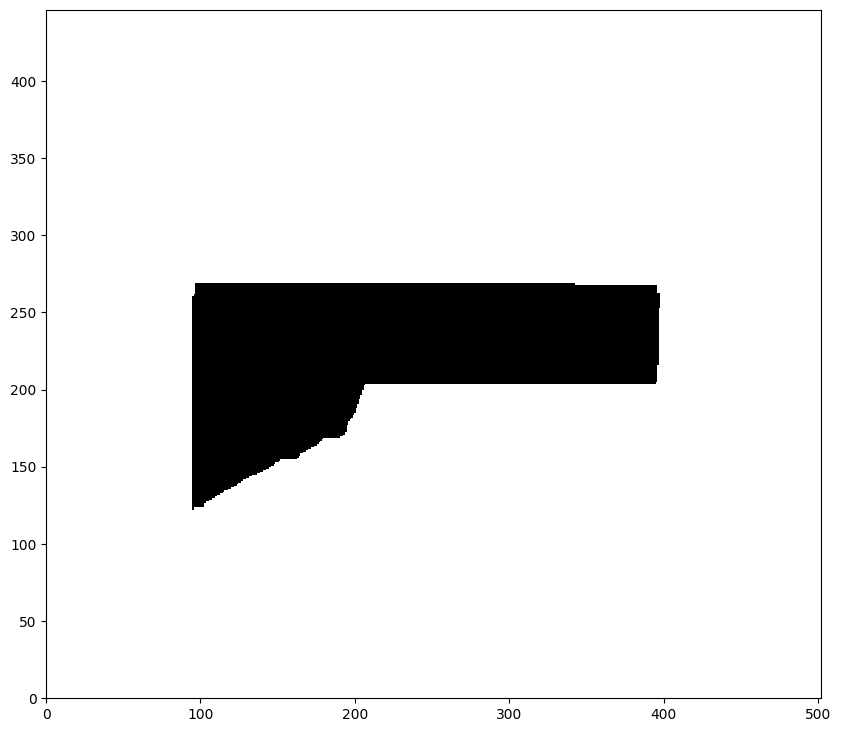

In [5]:
#loop through each row of the maze, find the very first 1 in the list and the very last 1 in the list, everything in between these indices should be set to 1.
for i in range(len(maze)):
    row = maze[i]
    num_ones = np.count_nonzero(row)
    if num_ones > 1:
        index_start = 0
        for j in range(len(row)):
            if row[j] == 1:
                index_start = j
                break
        
        index_end = 0
        for j in range(len(row) - 1, 0, -1):
            if row[j] == 1:
                index_end = j
                break
                
        maze[i, index_start:index_end] = 1
        
# do the same for the columns
for i in range(len(maze[0])):
    col = maze[:, i]
    num_ones = np.count_nonzero(col)
    if num_ones > 1:
        index_start = 0
        for j in range(len(col)):
            if col[j] == 1:
                index_start = j
                break
        
        index_end = 0
        for j in range(len(col) - 1, 0, -1):
            if col[j] == 1:
                index_end = j
                break
                
        maze[index_start:index_end, i] = 1
    
plt.figure(figsize=(10, 10))
plt.imshow(maze, cmap='binary', interpolation='nearest')
plt.gca().invert_yaxis()
plt.xlim(0, len(maze[0]))
plt.ylim(0, len(maze))
plt.show()

302 146


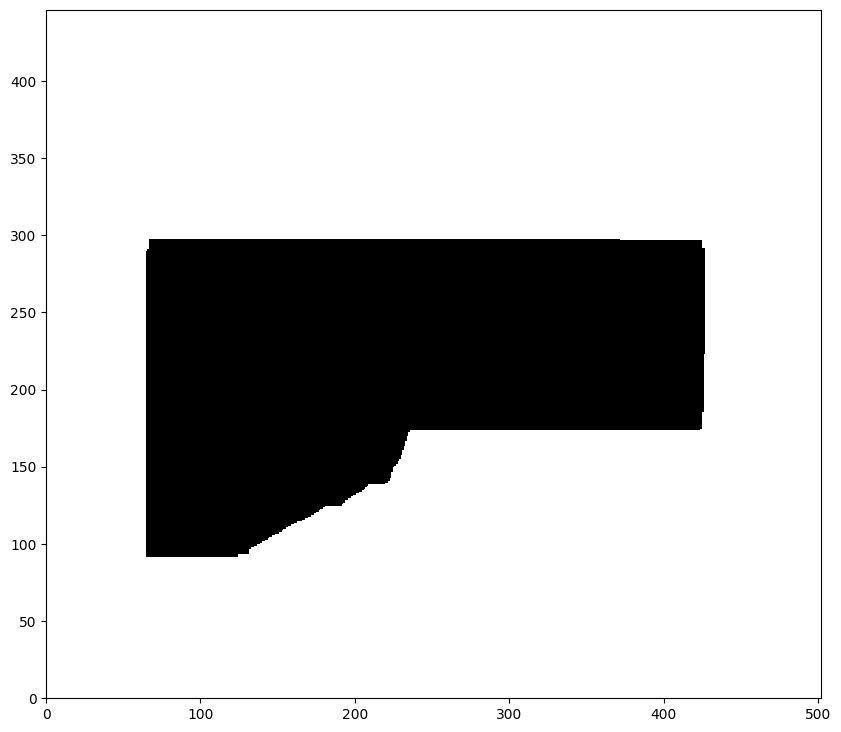

In [6]:
# print the range of the x and y values of the points in maze
p = np.argwhere(maze == 1)
x_range = p[:, 1].max() - p[:, 1].min()
y_range = p[:, 0].max() - p[:, 0].min()
print(x_range, y_range)

# add an offset to the maze, all points within n pixeles of a 1 should be set to 1
n = 30
m = maze.copy()
maze_offset = np.zeros_like(maze)

for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i, j] == 1:
            for k in range(-n, n):
                for l in range(-n, n):
                    if 0 <= i + k < len(maze) and j + l >= 0 and j + l < len(maze[0]):
                        maze_offset[i + k, j + l] = 1
                        
plt.figure(figsize=(10, 10))
plt.imshow(maze_offset, cmap='binary', interpolation='nearest')
plt.gca().invert_yaxis()
plt.xlim(0, len(m[0]))
plt.ylim(0, len(m))
plt.show()

In [7]:
# print the range of the x and y values of the points in maze_offset
p = np.argwhere(maze_offset == 1)
x_range = p[:, 1].max() - p[:, 1].min()
y_range = p[:, 0].max() - p[:, 0].min()
print(x_range, y_range)

361 205


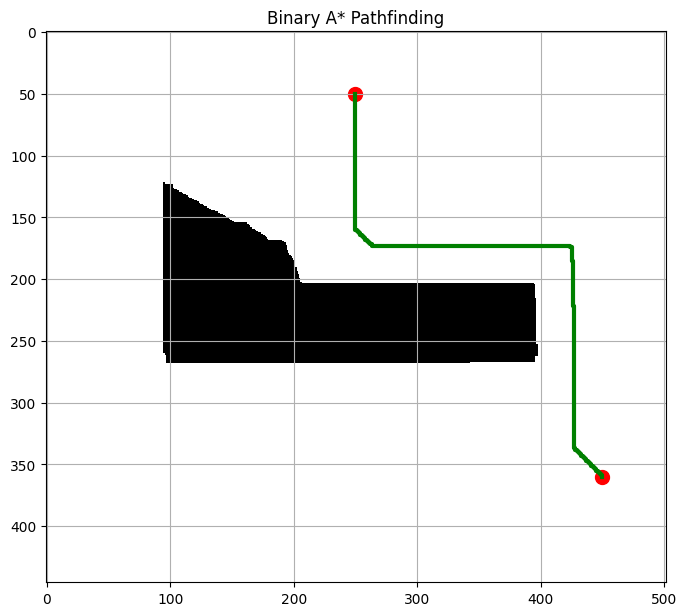

In [8]:
start = (50, 250)
end = (360, 450)

path = astar(maze_offset, start, end)

plt.figure(figsize=(8, 8))
plt.imshow(maze, cmap='binary', interpolation='nearest')
plt.title('Binary A* Pathfinding')

plt.scatter(start[1], start[0], color='red', s=100, label='Start')
plt.scatter(end[1], end[0], color='red', s=100, label='End')

path = np.array(path)
plt.plot(path[:, 1], path[:, 0], color='green', linewidth=3, label='Path')
plt.grid()
plt.show()

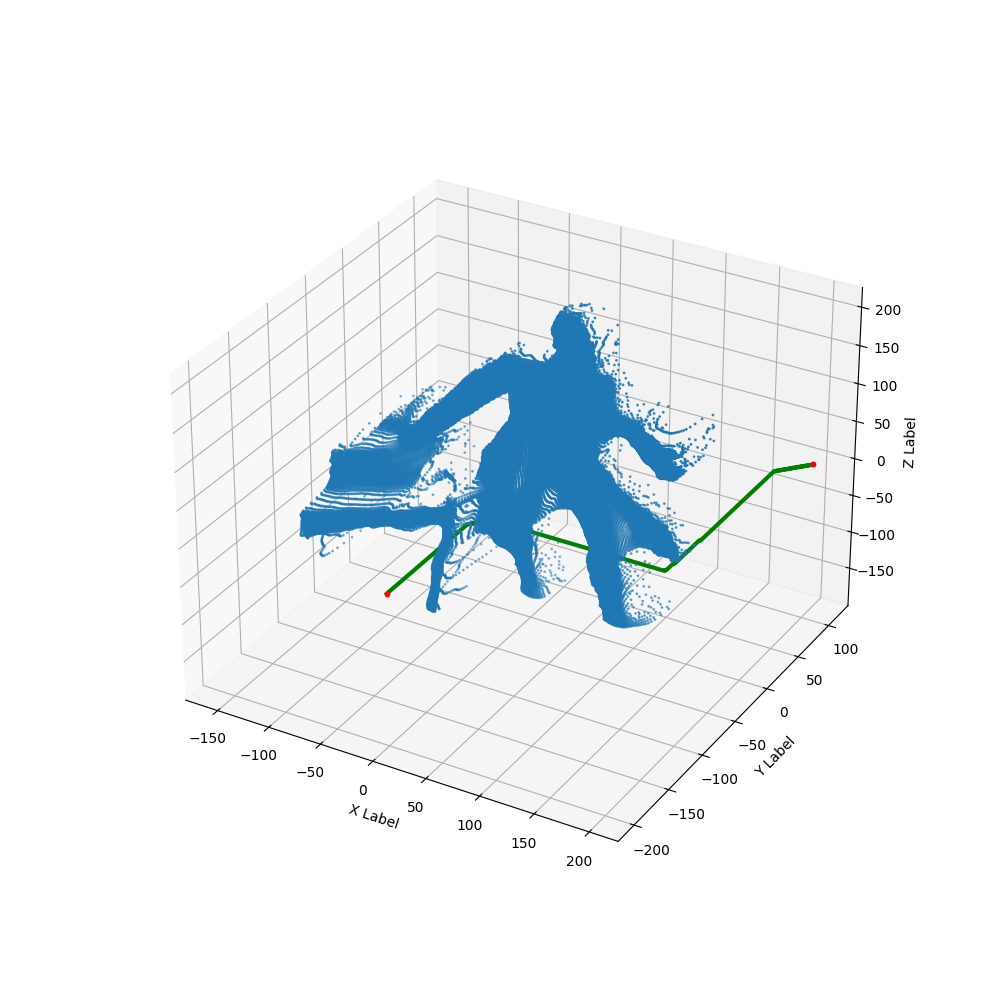

In [9]:
%matplotlib widget

p2 = astar_3d('mason_cloud_filtered.xyz')
p2 = np.array(p2)

# recenter the points based on the average x, y, z values
p2[:, 0] = p2[:, 0] - p2[:, 0].mean()
p2[:, 1] = p2[:, 1] - p2[:, 1].mean()
p2[:, 2] = p2[:, 2] - p2[:, 2].mean()

#plot p2 in 3d
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

#plot the path in 3d, keep z = 0 for all points
path = np.array(path)
path = np.hstack((path, np.zeros((len(path), 1))))

#offset the path so that it starts at (a, b) and all the points should be calculated as deltas to the next point interpolated to this new starting location
a = -200
b = 0
path[:, 0] = path[:, 0] - path[0, 0] + a

path[:, 1] = path[:, 1] - path[0, 1] + b

ax.plot(path[:, 1], path[:, 0], path[:, 2], color='green', linewidth=3)

ax.scatter(p2[:, 0], p2[:, 1] * 10, p2[:, 2], s=1)

# plot the start and end points of path in red with size 10
ax.scatter(path[0, 1], path[0, 0], path[0, 2], color='red', s=10)
ax.scatter(path[-1, 1], path[-1, 0], path[-1, 2], color='red', s=10)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

[(6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (5, 8), (5, 9), (4, 9), (3, 9), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (2, 19), (2, 20), (2, 21), (2, 22), (3, 22), (3, 23), (4, 23), (4, 24), (4, 25), (5, 25), (6, 25), (7, 25), (7, 26), (7, 27), (8, 27), (9, 27), (9, 28), (10, 28), (11, 28), (11, 27), (11, 26), (11, 25), (11, 24), (11, 23), (11, 22), (11, 21), (11, 20), (12, 20)]


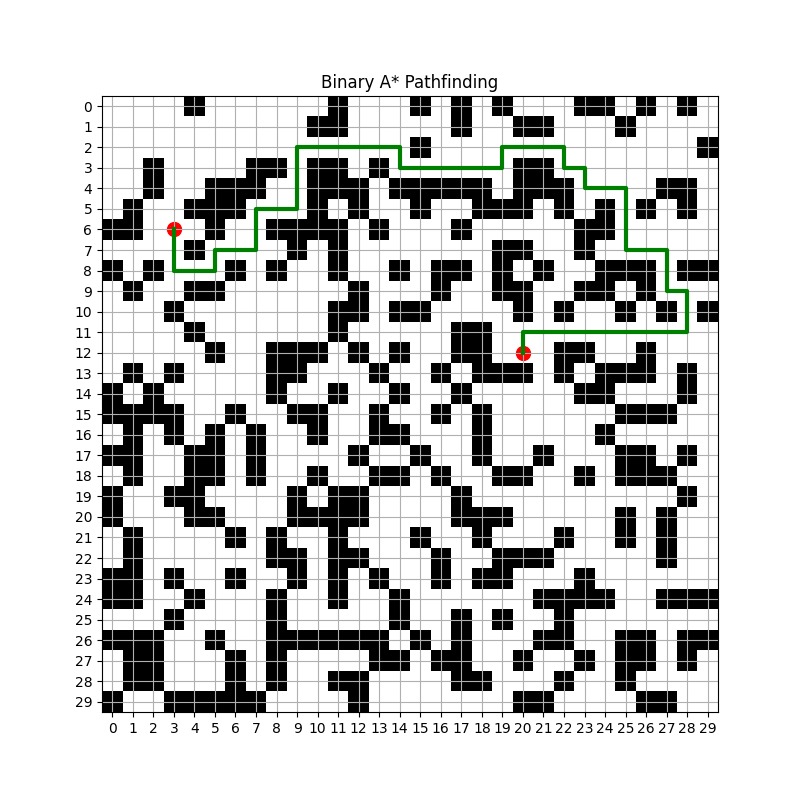

In [10]:
if __name__ == '__main__':
    maze = generate_binary_maze(30, 30, 0.35)
    
    start, end = find_start_end_points(np.array(maze))

    path = astar(maze, start, end)
    print(path)

    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='binary', interpolation='nearest')
    plt.xticks(range(len(maze[0])))
    plt.yticks(range(len(maze)))
    plt.title('Binary A* Pathfinding')
    
    plt.scatter(start[1], start[0], color='red', s=100, label='Start')
    plt.scatter(end[1], end[0], color='red', s=100, label='End')
    
    path = np.array(path)
    plt.plot(path[:, 1], path[:, 0], color='green', linewidth=3, label='Path')
    plt.grid()
    plt.show()